In [1]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# objectives

Identify top-performing cafes: By analyzing positive reviews, the goal is to highlight cafes that excel in customer satisfaction across various cities, allowing for targeted recognition of successful businesses.

Filter customer sentiment by location: Grouping reviews by cities helps understand regional variations in customer experiences and identify areas with the most satisfied or unsatisfied customers.

Visualize trends for decision-making: The bar charts and sentiment analysis help visually interpret which cafes are performing well, enabling data-driven decisions for improvements in service, product offerings, or marketing strategies​(Zomato Cafe Reviews).

# **About Dataset**
**CafeCritic:** A Flavorful Dataset of Cafe Reviews

Uncover the essence of cafe experiences with CafeCritic, a comprehensive dataset that captures the aroma and ambiance of cafes through genuine customer reviews. This dataset contains essential information including an index, cafe name, overall rating, cuisine, average cost for two, city, and insightful reviews. Dive into the world of cafes and explore their flavors through the discerning lens of patrons.

Columns:

**Index:** A unique identifier for each review entry.
**Name:** The name of the cafe being reviewed.
**Overall Rating:** The overall rating provided by the reviewer.
**Cuisine:** The type of cuisine offered by the cafe.
**Rate for Two:** The average cost for two people dining at the cafe.
**City:** The city where the cafe is located.
**Review:** A detailed review written by the customer, capturing their experience.

In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/hitha sunil/Documents/Data Set/Zomato Cafe Reviews.csv")
df.head(10)

Name Overall_Rating  \
0       Oliver Brown            3.9   
1       Oliver Brown            3.9   
2       Crush Coffee              3   
3        The Mohalla            3.8   
4        The Mohalla            3.8   
5     The Shaka Cafe            4.3   
6     The Shaka Cafe            4.3   
7      Hobnob Bistro            3.7   
8              Mleko            4.8   
9  Kaffee - Mast Hai            4.1   

                                             Cuisine Rate for two       City  \
0  Cafe, Coffee, Shake, Juices, Beverages, Waffle...          500  ahmedabad   
1  Cafe, Coffee, Shake, Juices, Beverages, Waffle...          500  ahmedabad   
2                   Cafe, Shake, Beverages, Desserts          600  ahmedabad   
3                                               Cafe          550  ahmedabad   
4                                               Cafe          550  ahmedabad   
5  North Indian, Pizza, Asian, Chinese, Cafe, Des...        1,200  ahmedabad   
6  North Indian, Pizza, Asian, Chinese, Cafe, Des...        1,200  ahmedabad   
7  North Indian, Cafe, Italian, Chinese, Desserts...        1,000  ahmedabad   
8  Cafe, Coffee, Bakery, Fast Food, Continental, ...          800  ahmedabad   
9  Cafe, Pasta, Burger, Sandwich, Pizza, Wraps, D...        1,200  ahmedabad   

                                              Review  
0  Been to this place 3-4 times. Prakash is alway...  
1  I recently visited Oliver Brown on a weekend f...  
2                         Very watery ans thin shake  
3  it was not cheese burst pizza.. only cheeze wa...  
4  Yammi.,....test burger is best I love 💗 this B...  
5  food was not spicy , which I was told to resto...  
6  Punjabi Thali is great. The taste was good and...  
7  The owner didn't let us sit in the AC though i...  
8  Both coffees were spilled and the box of pasta...  
9  washroom was not available. had to use mall's ...

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            598 non-null    object
 1   Overall_Rating  598 non-null    object
 2   Cuisine         598 non-null    object
 3   Rate for two    598 non-null    object
 4   City            598 non-null    object
 5   Review          598 non-null    object
dtypes: object(6)
memory usage: 28.2+ KB
None


In [4]:
df.describe()

Name Overall_Rating                     Cuisine  \
count                         598            598                         598   
unique                        221             25                         224   
top     Oven The Bakery & Cafe               3.9  Cafe, Fast Food, Beverages   
freq                           16             81                           9   

       Rate for two       City Review  
count           598        598    598  
unique           27          9    595  
top             500  bangalore  good   
freq             97        153      3

# Preprocessing

In [5]:
def preprocess_text(text):
    if isinstance(text, str):  # Check if the input is a string
        # Remove punctuation, numbers, and convert to lowercase
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = text.lower()
        print(f"Text after removing punctuation, numbers, and converting to lowercase: {text}")
        
        # Tokenize the text
        tokens = word_tokenize(text)
        print(f"Tokens: {tokens}")
        
        # Remove stopwords
        tokens = [token for token in tokens if token not in stopwords.words('english')]
        print(f"Tokens after removing stopwords: {tokens}")
        
        # Lemmatize the tokens
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        print(f"Lemmatized tokens: {lemmatized_tokens}")
        
        # Join the tokens back into a string
        text = ' '.join(lemmatized_tokens)
        print(f"Preprocessed text: {text}")
    else:
        text = ''  # Replace missing or null values with an empty string
    return text

# Apply the preprocessing function to the review text
for i in range(3):
    df.loc[i, 'Review'] = preprocess_text(df.loc[i, 'Review'])

# Print the first few rows of the preprocessed dataset
print(df.head(1))

Text after removing punctuation, numbers, and converting to lowercase: been to this place  times prakash is always very sweet and accommodating plus always ask vaibhav to make your shakes they are perfect
Tokens: ['been', 'to', 'this', 'place', 'times', 'prakash', 'is', 'always', 'very', 'sweet', 'and', 'accommodating', 'plus', 'always', 'ask', 'vaibhav', 'to', 'make', 'your', 'shakes', 'they', 'are', 'perfect']
Tokens after removing stopwords: ['place', 'times', 'prakash', 'always', 'sweet', 'accommodating', 'plus', 'always', 'ask', 'vaibhav', 'make', 'shakes', 'perfect']
Lemmatized tokens: ['place', 'time', 'prakash', 'always', 'sweet', 'accommodating', 'plus', 'always', 'ask', 'vaibhav', 'make', 'shake', 'perfect']
Preprocessed text: place time prakash always sweet accommodating plus always ask vaibhav make shake perfect
Text after removing punctuation, numbers, and converting to lowercase: i recently visited oliver brown on a weekend for a cup of iced coffee and i was thoroughly im

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Define a function to calculate the sentiment score
def calculate_sentiment(text):
    if pd.isna(text):  # Check if the text is missing (NaN)
        text = ""
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Apply the sentiment analysis function to the review text
df['Sentiment Score'] = df['Review'].apply(calculate_sentiment)
print(df.head())  # Print the first few rows of the DataFrame

           Name Overall_Rating  \
0  Oliver Brown            3.9   
1  Oliver Brown            3.9   
2  Crush Coffee              3   
3   The Mohalla            3.8   
4   The Mohalla            3.8   

                                             Cuisine Rate for two       City  \
0  Cafe, Coffee, Shake, Juices, Beverages, Waffle...          500  ahmedabad   
1  Cafe, Coffee, Shake, Juices, Beverages, Waffle...          500  ahmedabad   
2                   Cafe, Shake, Beverages, Desserts          600  ahmedabad   
3                                               Cafe          550  ahmedabad   
4                                               Cafe          550  ahmedabad   

                                              Review  Sentiment Score  
0  place time prakash always sweet accommodating ...           0.7184  
1  recently visited oliver brown weekend cup iced...           0.9680  
2                               watery an thin shake          -0.1779  
3  it was not cheese burst

In [7]:
# Define a function to categorize the sentiment
def categorize_sentiment(score):
    if score > 0.5:
        return 'Positive'
    elif score < -0.5:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorization function to the sentiment score
df['Sentiment Category'] = df['Sentiment Score'].apply(categorize_sentiment)

print(df.head())  # Print the first few rows of the updated DataFrame

           Name Overall_Rating  \
0  Oliver Brown            3.9   
1  Oliver Brown            3.9   
2  Crush Coffee              3   
3   The Mohalla            3.8   
4   The Mohalla            3.8   

                                             Cuisine Rate for two       City  \
0  Cafe, Coffee, Shake, Juices, Beverages, Waffle...          500  ahmedabad   
1  Cafe, Coffee, Shake, Juices, Beverages, Waffle...          500  ahmedabad   
2                   Cafe, Shake, Beverages, Desserts          600  ahmedabad   
3                                               Cafe          550  ahmedabad   
4                                               Cafe          550  ahmedabad   

                                              Review  Sentiment Score  \
0  place time prakash always sweet accommodating ...           0.7184   
1  recently visited oliver brown weekend cup iced...           0.9680   
2                               watery an thin shake          -0.1779   
3  it was not cheese b

In [8]:
# Define thed name for the new CSV file
file_path = "C:/Users/hitha sunil/Documents/Data Set/Zomato Cafe Reviews adjusted(2).csv"

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print(f"File saved successfully as {file_path}")


File saved successfully as C:/Users/hitha sunil/Documents/Data Set/Zomato Cafe Reviews adjusted(2).csv


In [9]:
data=pd.read_csv("C:/Users/hitha sunil/Documents/Data Set/Zomato Cafe Reviews adjusted(2).csv")
data.head()

Name Overall_Rating  \
0  Oliver Brown            3.9   
1  Oliver Brown            3.9   
2  Crush Coffee              3   
3   The Mohalla            3.8   
4   The Mohalla            3.8   

                                             Cuisine Rate for two       City  \
0  Cafe, Coffee, Shake, Juices, Beverages, Waffle...          500  ahmedabad   
1  Cafe, Coffee, Shake, Juices, Beverages, Waffle...          500  ahmedabad   
2                   Cafe, Shake, Beverages, Desserts          600  ahmedabad   
3                                               Cafe          550  ahmedabad   
4                                               Cafe          550  ahmedabad   

                                              Review  Sentiment Score  \
0  place time prakash always sweet accommodating ...           0.7184   
1  recently visited oliver brown weekend cup iced...           0.9680   
2                               watery an thin shake          -0.1779   
3  it was not cheese burst pizza.. only cheeze wa...          -0.4585   
4  Yammi.,....test burger is best I love 💗 this B...           0.8020   

  Sentiment Category  
0           Positive  
1           Positive  
2            Neutral  
3            Neutral  
4           Positive

# LDA & LSA

In [10]:
# Required libraries
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = stopwords.words('english')
# Handling NaN values in the Review_Text column by replacing them with an empty string
df['Review'].fillna('', inplace=True)

# Preprocessing the Review_Text
review_texts = df['Review'].values

# Vectorization using CountVectorizer (for LDA) and TfidfVectorizer (for LSA)
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)

# Fit and transform the text data
count_data = count_vectorizer.fit_transform(review_texts)
tfidf_data = tfidf_vectorizer.fit_transform(review_texts)

# Proceed with LDA and LSA as before
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(count_data)

lsa_model = TruncatedSVD(n_components=5, random_state=42)
lsa_model.fit(tfidf_data)

# Helper function to display topics
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append(f"Topic {topic_idx}: " + " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return topics

# Display topics for LDA
lda_topics = display_topics(lda_model, count_vectorizer.get_feature_names_out(), 10)

# Display topics for LSA
lsa_topics = display_topics(lsa_model, tfidf_vectorizer.get_feature_names_out(), 10)

lda_topics, lsa_topics

[nltk_data] Downloading package stopwords to C:\Users\hitha
[nltk_data]     sunil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


(['Topic 0: food place good coffee must nice visit really service like',
  'Topic 1: worst taste ice less cream brownie bad even like good',
  'Topic 2: good taste place food also ordered pizza sandwich pasta time',
  'Topic 3: food place good amazing best delicious bad cafe ambience taste',
  'Topic 4: restaurant food cafe service experience space perfect staff ordered working'],
 ['Topic 0: good food nice place taste quality great service must amazing',
  'Topic 1: good taste less one pasta due base price point sometimes',
  'Topic 2: nice food good quality taste beverage reduced long packing higher',
  'Topic 3: taste bad coffee worst cold like ordered pizza nice experience',
  'Topic 4: coffee cold nice good spilled worst hot tasteless town pasta'])

# INFERENCE
Based on the topics extracted by LDA and LSA, here are some inferences:

Common themes:

Food quality and taste are important aspects of the reviews.
The ambiance and service of the cafe/restaurant are also mentioned frequently.
There are mixed opinions about the food, with some reviewers enjoying it and others not.
Differences between LDA and LSA:

LDA topics seem to be more focused on specific aspects of the cafe/restaurant experience, such as food, service, and ambiance.
LSA topics appear to be more general, with a focus on overall quality and taste.
Insights:

The cafe/restaurant needs to improve its food quality and taste to satisfy customers.
The service and ambiance are important aspects that can make or break the customer experience.
There may be inconsistencies in the quality of food and service, leading to mixed opinions.

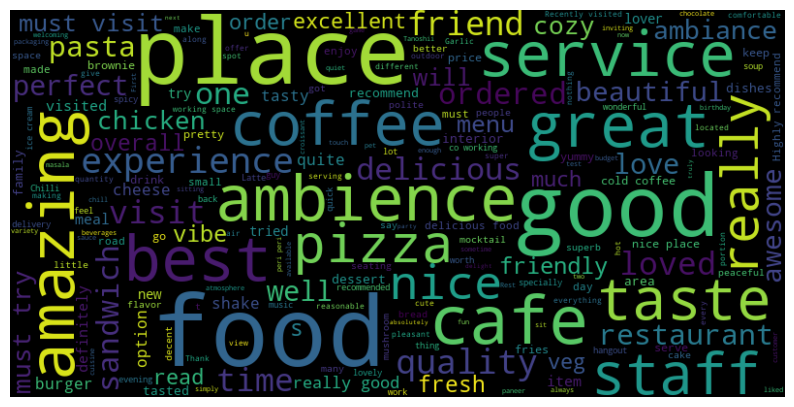

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter positive reviews
positive_reviews = data[data['Sentiment Category'] == 'Positive']

# Join all review texts into a single string
positive_text = ' '.join(positive_reviews['Review'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, max_font_size=100).generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

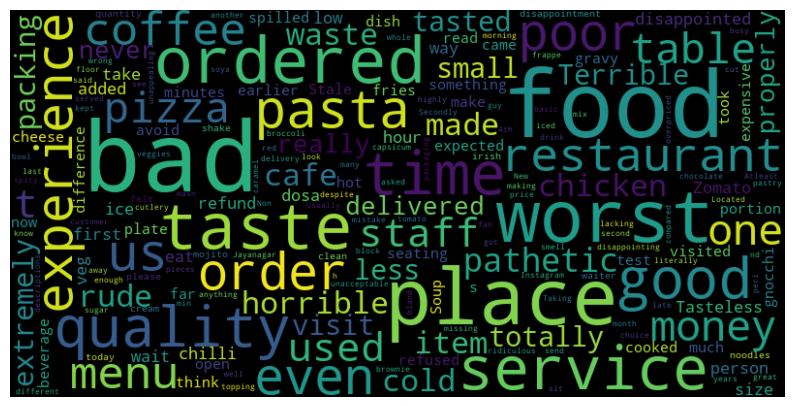

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter positive reviews
positive_reviews = data[data['Sentiment Category'] == 'Negative']

# Join all review texts into a single string
positive_text = ' '.join(positive_reviews['Review'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, max_font_size=100).generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
import plotly.express as px

# Count the number of reviews for each sentiment category
sentiment_counts = data['Sentiment Category'].value_counts()

# Create a pie chart
fig = px.pie(values=sentiment_counts, names=sentiment_counts.index, 
             title='Sentiment Category Distribution')
fig.update_layout(title_x=0.5)
fig.show()

In [14]:
# Get total number of unique Cafe Names
unique_cafe_names = df['Name'].nunique()

# Get total number of unique Cuisine types
# Assuming cuisines are separated by commas in each row, we'll split and flatten the list to find unique cuisines
unique_cuisines = set([c.strip() for sublist in df['Cuisine'].dropna().str.split(',') for c in sublist])

# Output the results
print(f"Total unique Cafe Names: {unique_cafe_names}")
print(f"Total unique Cuisine types: {len(unique_cuisines)}")


Total unique Cafe Names: 221
Total unique Cuisine types: 45


In [15]:
# Count the number of times each cafe name appears in the dataset
name_counts = df['Name'].value_counts()

# Display the result
print(name_counts)


Oven The Bakery & Cafe       16
McCafe by McDonald's         11
McCafe by McDonald's          6
Brown Sugar                   6
Oven The Bakery & Cafe        6
                             ..
Koffee King                   1
Crazy Cheesy Cafe             1
Cafe Da Al Forno              1
Cafe Cosy                     1
Cafe Time Out                 1
Name: Name, Length: 221, dtype: int64


In [16]:
# Filter the dataset for positive reviews
positive_reviews = df[df['Sentiment Category'] == 'Positive']

# Count the number of positive reviews per cafe
positive_review_counts = positive_reviews['Name'].value_counts()

# Get the top 10 cafes with the most positive reviews
top_10_positive_cafes = positive_review_counts.head(10)

# Display the result
print(top_10_positive_cafes)


McCafe by McDonald's             7
Oven The Bakery & Cafe           7
The 2.0 Drinks                   5
Alora Cafe & Patisserie          5
Aeka Coffee                      5
One World - The Coffee Studio    5
Coffee Network                   5
Tanoshii Cafe                    5
Kana By Coffee Mechanics         5
Jashn                            4
Name: Name, dtype: int64


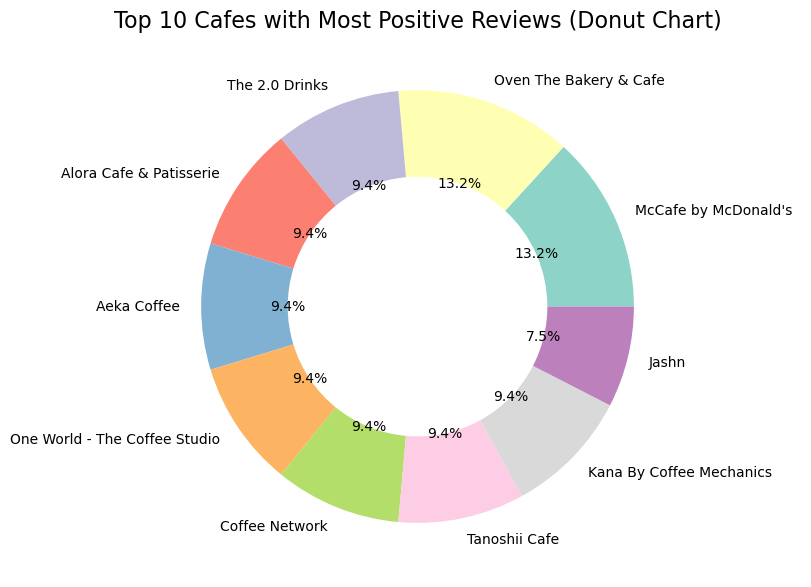

In [17]:
import seaborn as sns

# Donut chart for top 10 cafes with most positive reviews
plt.figure(figsize=(8, 8))
top_10_positive_cafes.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3'), wedgeprops=dict(width=0.4))

# Title and labels
plt.title('Top 10 Cafes with Most Positive Reviews (Donut Chart)', fontsize=16)
plt.ylabel('')  # Remove the default y-axis label

# Show the plot
plt.tight_layout()
plt.show()


# INFERENCE
The chart highlights the top 10 cafes with the most positive reviews, indicating which cafes are excelling in terms of customer satisfaction.
Insights:

The top-performing cafes may be doing something right in terms of their products, services, or overall customer experience, which is contributing to their high number of positive reviews.

In [18]:
# Filter the dataset for positive reviews
positive_reviews = df[df['Sentiment Category'] == 'Negative']

# Count the number of positive reviews per cafe
positive_review_counts = positive_reviews['Name'].value_counts()

# Get the top 10 cafes with the most positive reviews
top_10_positive_cafes = positive_review_counts.head(10)

# Display the result
print(top_10_positive_cafes)

Wanna Puff               4
The Creamery Cafe        3
Brown Sugar              3
SST Cakes & Bakes        2
Narcos Cafe              2
Z27 By Cafe Lake City    2
The Messy Door Cafe      2
Cafe Pink Pajamas        2
Chill-Um Cafe            2
Pot Head                 2
Name: Name, dtype: int64


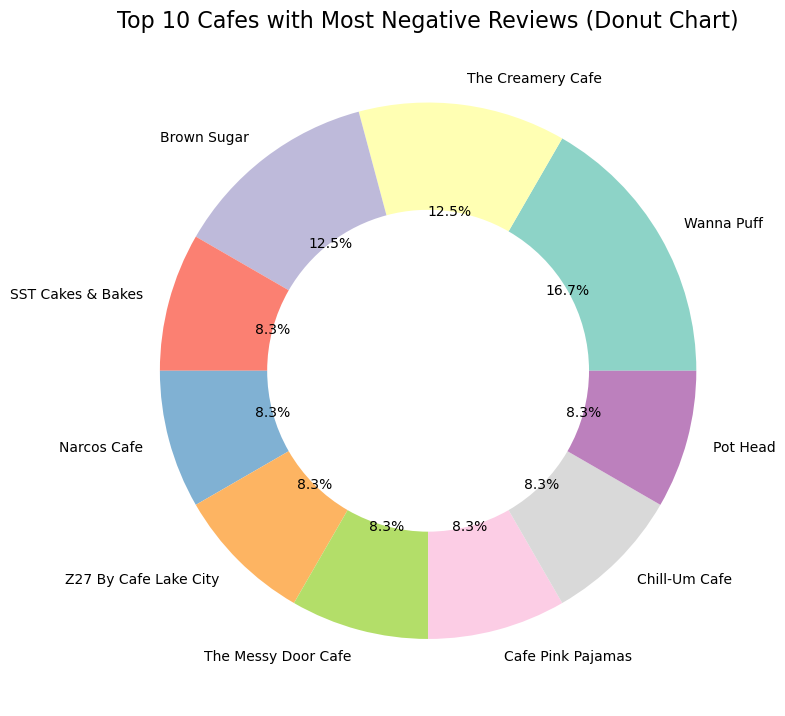

In [19]:
import seaborn as sns

# Donut chart for top 10 cafes with most positive reviews
plt.figure(figsize=(8, 8))
top_10_positive_cafes.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3'), wedgeprops=dict(width=0.4))

# Title and labels
plt.title('Top 10 Cafes with Most Negative Reviews (Donut Chart)', fontsize=16)
plt.ylabel('')  # Remove the default y-axis label

# Show the plot
plt.tight_layout()
plt.show()

# INFERENCE
The chart highlights the top 10 cafes with the most negative reviews, indicating which cafes are struggling in terms of customer satisfaction.
Insights:

The underperforming cafes may be doing something wrong in terms of their products, services, or overall customer experience, which is contributing to their high number of negative reviews.
The chart may also identify areas for improvement for cafes that are not receiving as many negative reviews, allowing them to target specific areas for improvement.
The chart can be used to inform business decisions, such as identifying opportunities for improvement or areas for investment.

# Motive:

The motive behind creating this bar chart is to visualize the average sentiment score of customers across different cities. By analyzing the sentiment scores, businesses can identify which cities have the most satisfied customers and which cities need improvement. This information can be used to make data-driven decisions to enhance customer experience and increase customer loyalty.

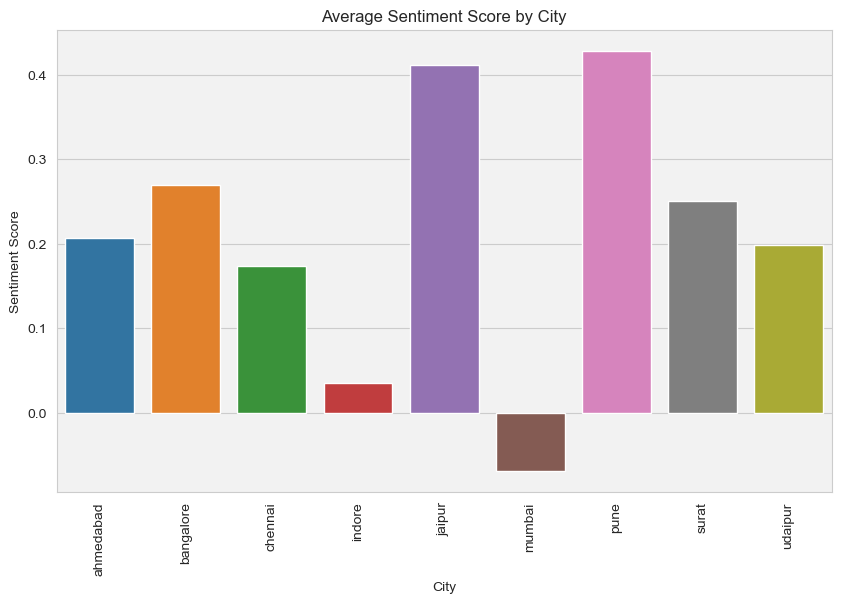

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by city and calculate average sentiment score
city_sentiment = df.groupby('City')['Sentiment Score'].mean().reset_index()

# Bar Chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Set the style to whitegrid
ax = sns.barplot(x='City', y='Sentiment Score', data=city_sentiment)
ax.set_title('Average Sentiment Score by City')
ax.set_xlabel('City')
ax.set_ylabel('Sentiment Score')
ax.tick_params(axis='x', rotation=90)
ax.set_facecolor('#f2f2f2')  # Set the background color to light gray
plt.show()

# Inference:

From the bar chart, we can infer the following:

The cities with the highest average sentiment scores are likely to have the most satisfied customers.
The cities with the lowest average sentiment scores may have issues with customer satisfaction and require attention from the business.
The chart can help identify patterns or trends in customer sentiment across different cities, which can inform business strategies to improve customer experience.
The chart can also be used to compare the sentiment scores of different cities, allowing businesses to prioritize their efforts on the cities that need the most improvement.
Additional Insights:

The chart can be further analyzed to identify correlations between sentiment scores and other factors, such as demographics, product offerings, or marketing strategies.
The chart can be used to track changes in sentiment scores over time, allowing businesses to evaluate the effectiveness of their strategies and make adjustments as needed.
The chart can be shared with stakeholders, such as investors or customers, to provide transparency and demonstrate a commitment to customer satisfaction.

In [21]:
import plotly.express as px

# Group by city and calculate average sentiment score
city_sentiment = df.groupby('City')['Sentiment Score'].mean().reset_index()
color_sequence = ['#FF69B4', '#33CC33', '#6666FF', '#FFCC00', '#0099CC']  # custom color sequence
fig = px.bar(city_sentiment, x='City', y='Sentiment Score', title='Average Sentiment Score by City',
             labels={'City': 'City', 'Sentiment Score': 'Sentiment Score'},
             color_discrete_sequence=color_sequence)

fig.update_layout(xaxis_tickangle=-45)  # rotate x-axis labels

fig.show()

In [22]:
# Count the number of times each cafe name appears in the dataset
cuisine_counts = df['Cuisine'].value_counts()

# Display the result
print(cuisine_counts)


Cafe, Fast Food, Beverages                                                  9
Cafe                                                                        8
Cafe, Coffee, Shake, Fast Food, Desserts                                    6
Cafe, Italian, Fast Food, Beverages                                         6
Cafe, Coffee, Fast Food, Beverages                                          6
                                                                           ..
Cafe, Shake, Beverages, Desserts                                            1
North Indian, Chinese, Fast Food, Cafe, Coffee, Juices, Beverages           1
Cafe, Italian, Chinese, Mexican, Fast Food, Waffle, Desserts, Beverages     1
Cafe, North Indian, Italian, Mexican, Thai, Biryani, Desserts, Beverages    1
Cafe, Asian, Italian, North Indian, Beverages, Desserts                     1
Name: Cuisine, Length: 224, dtype: int64


In [23]:
import pandas as pd

# Get top 10 most common cuisines
top_10_cuisines = cuisine_counts.nlargest(10)

print("\nTop 10 Most Common Cuisines:")
print(top_10_cuisines)


Top 10 Most Common Cuisines:
Cafe, Fast Food, Beverages                                                          9
Cafe                                                                                8
Cafe, Coffee, Shake, Fast Food, Desserts                                            6
Cafe, Italian, Fast Food, Beverages                                                 6
Cafe, Coffee, Fast Food, Beverages                                                  6
Cafe, North Indian, Italian, Chinese, Fast Food, Desserts, Beverages                5
Cafe, Coffee, Shake, Beverages, Burger, Fast Food, Chinese, Desserts                5
Cafe, American, Pizza, Chinese, Fast Food, Shake                                    5
Cafe, Beverages, North Indian, Healthy Food, Mexican, Italian, Chinese, Desserts    5
Cafe, Coffee, Shake, Beverages, Italian, Pizza, Pasta, Fast Food                    5
Name: Cuisine, dtype: int64


In [24]:
import plotly.express as px

# Assuming 'top_10_cuisines' is the Series with the top 10 most common cuisines

# Create a bubble chart
fig = px.scatter(x=range(len(top_10_cuisines)), y=top_10_cuisines.values, size=top_10_cuisines.values,
                 hover_name=top_10_cuisines.index, color=top_10_cuisines.values,
                 labels={'x': 'Rank', 'y': 'Count', 'size': 'Count', 'color': 'Count'},
                 title='Top 10 Most Common Cuisines')

fig.show()

In [25]:
import pandas as pd

# Assuming 'df' is the DataFrame with 'Cuisine' column

# Get unique cuisines
unique_cuisines = df['Cuisine'].unique()

# Split the cuisines into individual items
items = [item for cuisine in unique_cuisines for item in cuisine.split(', ')]

# Count the frequency of each item
item_counts = pd.Series(items).value_counts()

print("\nTop Items Ordered:")
print(item_counts)


Top Items Ordered:
Cafe              224
Beverages         188
Fast Food         156
Desserts          112
Coffee             94
Sandwich           69
Pizza              69
Shake              68
Italian            66
Chinese            64
North Indian       47
Continental        43
Burger             33
Pasta              28
Bakery             22
Mexican            21
Street Food        20
Tea                16
Salad              15
Asian              12
Healthy Food       12
Ice Cream          10
Waffle              8
South Indian        6
American            6
Lebanese            4
Rolls               4
Thai                4
Sichuan             4
Momos               4
European            3
Panini              3
Oriental            3
Wraps               3
Biryani             2
Juices              2
Mediterranean       1
                    1
Japanese            1
Sushi               1
Korean              1
Pancake             1
BBQ                 1
Finger Food         1
Middle Easte

# Motive:

The motive behind creating this word cloud is to visualize the top items ordered by customers. By analyzing the word cloud, businesses can identify the most popular items, trends, and patterns in customer purchasing behavior. This information can be used to inform inventory management, marketing strategies, and product development.

Inference:

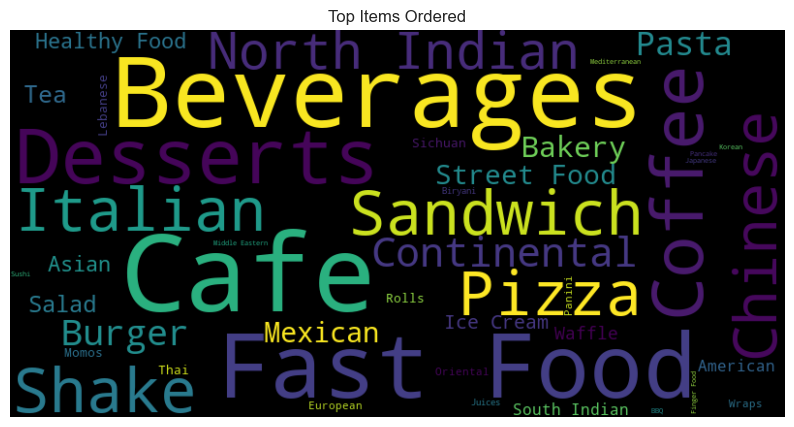

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'item_counts' is the Series with the item counts

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate_from_frequencies(item_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Top Items Ordered')
plt.show()

# INFERENCE
The chart can be used to compare the popularity of different items, allowing businesses to prioritize their efforts on the most in-demand products.

In [27]:
import plotly.express as px

# Create a heatmap
fig = px.density_heatmap(data, x='Rate for two', y='Sentiment Score', 
                         title='Heatmap of Rate for Two and Sentiment Score')

fig.update_layout(xaxis_title='Rate for Two', yaxis_title='Sentiment Score')
fig.show()

This heatmap shows the relationship between the rate for two and the sentiment score. The brighter the color, the more frequent that combination of rate and sentiment occurs. We can see that the highest rates for two are associated with the highest sentiment scores. This suggests that people are more likely to give a higher rate when they have a positive sentiment towards the product or service.

In [28]:
import pandas as pd
import plotly.express as px

# Assume 'data' is your dataframe with columns 'Review', 'Sentiment Score', and 'Review Length'

# Calculate the review length
data['Review Length'] = data['Review'].apply(lambda x: len(x))

# Bar Chart: Average Sentiment Score by Review Length Categories
# Create review length categories
data['Review Length Category'] = pd.cut(data['Review Length'], bins=[0, 50, 100, 200, 500], 
                                       labels=['Short (0-50)', 'Medium (51-100)', 'Long (101-200)', 'Very Long (201-500)'])

# Calculate the average sentiment score for each review length category
avg_sentiment_by_length = data.groupby('Review Length Category')['Sentiment Score'].mean().reset_index()

# Bar Chart
fig = px.bar(avg_sentiment_by_length, x='Review Length Category', y='Sentiment Score', 
             title='Average Sentiment Score by Review Length Categories')
fig.update_layout(xaxis_title='Review Length Category', yaxis_title='Average Sentiment Score')
fig.show()

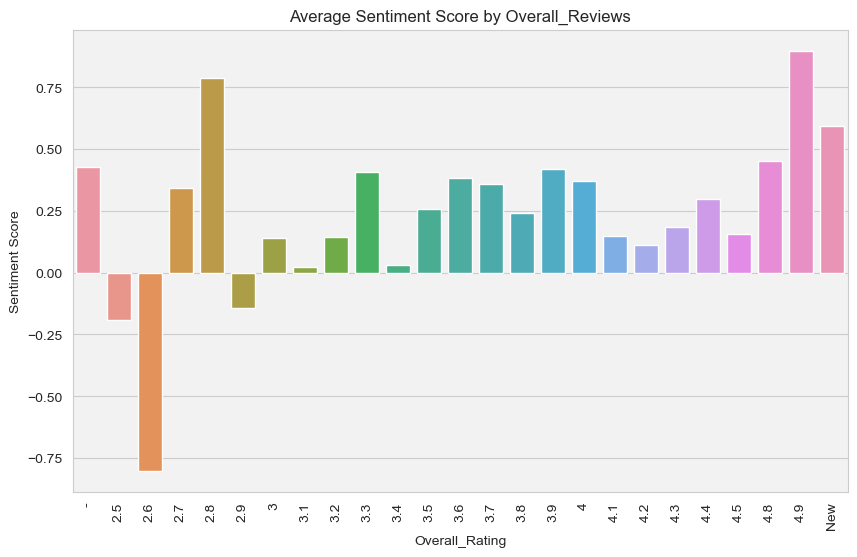

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by city and calculate average sentiment score
city_sentiment = df.groupby('Overall_Rating')['Sentiment Score'].mean().reset_index()

# Bar Chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Set the style to whitegrid
ax = sns.barplot(x='Overall_Rating', y='Sentiment Score', data=city_sentiment)
ax.set_title('Average Sentiment Score by Overall_Reviews')
ax.set_xlabel('Overall_Rating')
ax.set_ylabel('Sentiment Score')
ax.tick_params(axis='x', rotation=90)
ax.set_facecolor('#f2f2f2')  # Set the background color to light gray
plt.show()

Confusion Matrix:
 [[301 116]
 [ 66  37]]
Accuracy: 65.00%


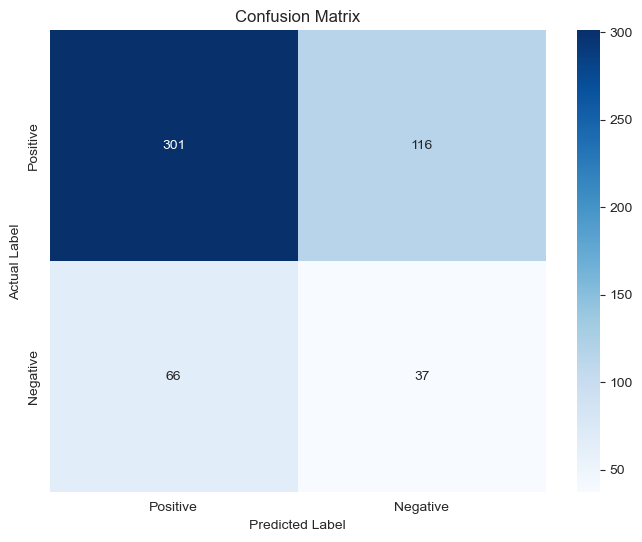

In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data creation for demonstration (replace this with your actual data loading step)
# Assume 'data' is your dataframe with columns 'Overall_Rating' and 'Sentiment Score'
# data = pd.read_csv('your_data.csv')

# Define the threshold for positive and negative reviews
positive_threshold = 3.5
negative_threshold = 2.5

# Ensure 'Overall_Rating' is numeric and clean invalid entries
data['Overall_Rating'] = pd.to_numeric(data['Overall_Rating'], errors='coerce')

# Drop rows with missing ratings
data.dropna(subset=['Overall_Rating'], inplace=True)

# Create a new column 'Actual Label' based on the 'Overall Rating'
data['Actual Label'] = np.where(data['Overall_Rating'] >= positive_threshold, 'Positive', 'Negative')

# Create a new column 'Predicted Label' based on the 'Sentiment Score'
data['Predicted Label'] = np.where(data['Sentiment Score'] >= 0, 'Positive', 'Negative')

# Create a confusion matrix
conf_mat = confusion_matrix(data['Actual Label'], data['Predicted Label'], labels=['Positive', 'Negative'])

# Print the confusion matrix
print("Confusion Matrix:\n", conf_mat)

# Calculate accuracy
accuracy = accuracy_score(data['Actual Label'], data['Predicted Label'])
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


In [31]:
import pandas as pd
import numpy as np

# Sample data creation for demonstration (replace this with your actual data loading step)
# Assume 'data' is your dataframe with columns 'Name', 'Area', 'Overall_Rating', and 'Sentiment Score'
# data = pd.read_csv('your_data.csv')

# Define the threshold for positive reviews
positive_threshold = 3.5

# Ensure 'Overall_Rating' is numeric and clean invalid entries
data['Overall_Rating'] = pd.to_numeric(data['Overall_Rating'], errors='coerce')

# Drop rows with missing ratings
data.dropna(subset=['Overall_Rating'], inplace=True)

# Create a new column 'Actual Label' based on the 'Overall Rating'
data['Actual Label'] = np.where(data['Overall_Rating'] >= positive_threshold, 'Positive', 'Negative')

# Filter for only positive reviews
positive_reviews = data[data['Actual Label'] == 'Positive']

# Group by 'Area' and 'Name', then count the number of positive reviews for each hotel in each city
positive_review_counts = positive_reviews.groupby(['City', 'Name']).size().reset_index(name='Positive_Review_Count')

# Sort by 'Area' and 'Positive_Review_Count' in descending order to get the top hotels in each city
positive_review_counts_sorted = positive_review_counts.sort_values(['City', 'Positive_Review_Count'], ascending=[True, False])

# Group by 'Area' and get the top 5 hotels for each city
top_5_hotels_by_city = positive_review_counts_sorted.groupby('City').head(5)

# Print the result
print(top_5_hotels_by_city)


          City                              Name  Positive_Review_Count
9    ahmedabad             I Love Sandwich House                      4
2    ahmedabad                       Cafe Selfie                      3
10   ahmedabad                 Indie Brewed Cafe                      3
11   ahmedabad                 Kaffee - Mast Hai                      3
16   ahmedabad            Oven The Bakery & Cafe                      3
46   bangalore            McCafe by McDonald's                        7
39   bangalore                            Django                      5
55   bangalore                    The 2.0 Drinks                      5
59   bangalore    The Farmhouse Kitchen & Bakery                      5
26   bangalore                          Banoffee                      4
67     chennai                     Chamiers Cafe                      4
70     chennai      Movenpick Ice Cream Boutique                      4
74     chennai                      The Pod Cafe                

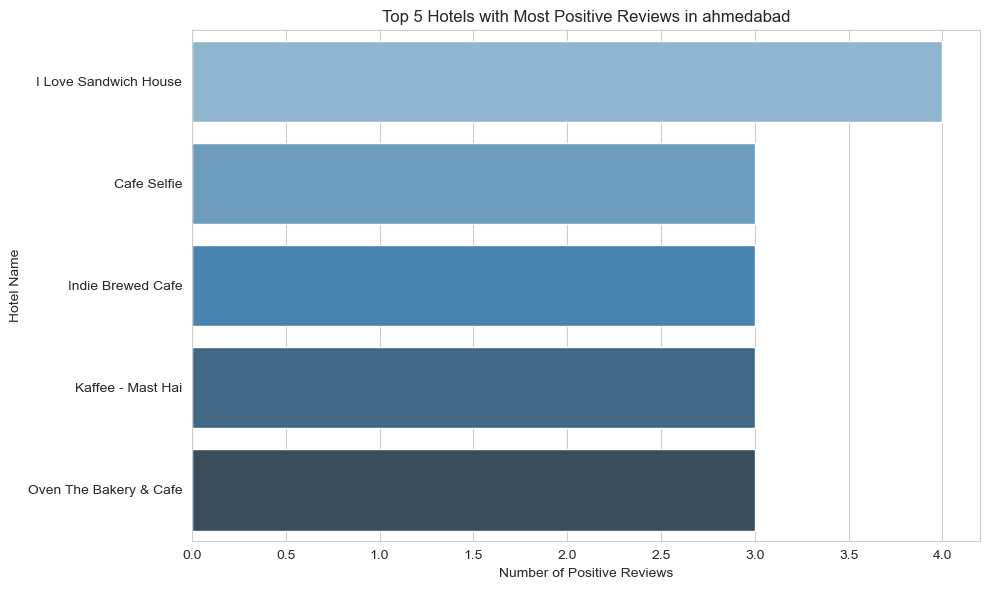

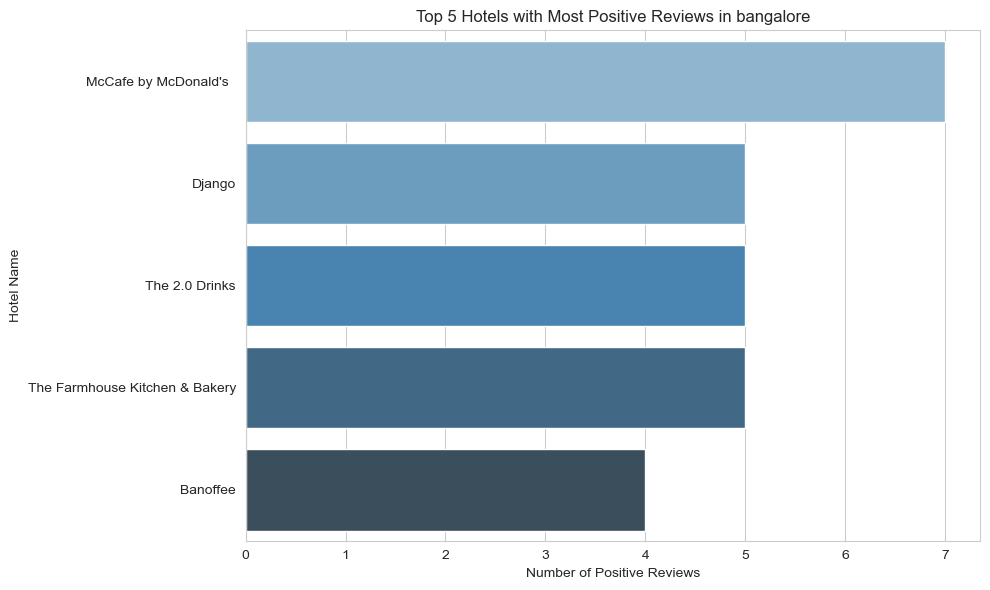

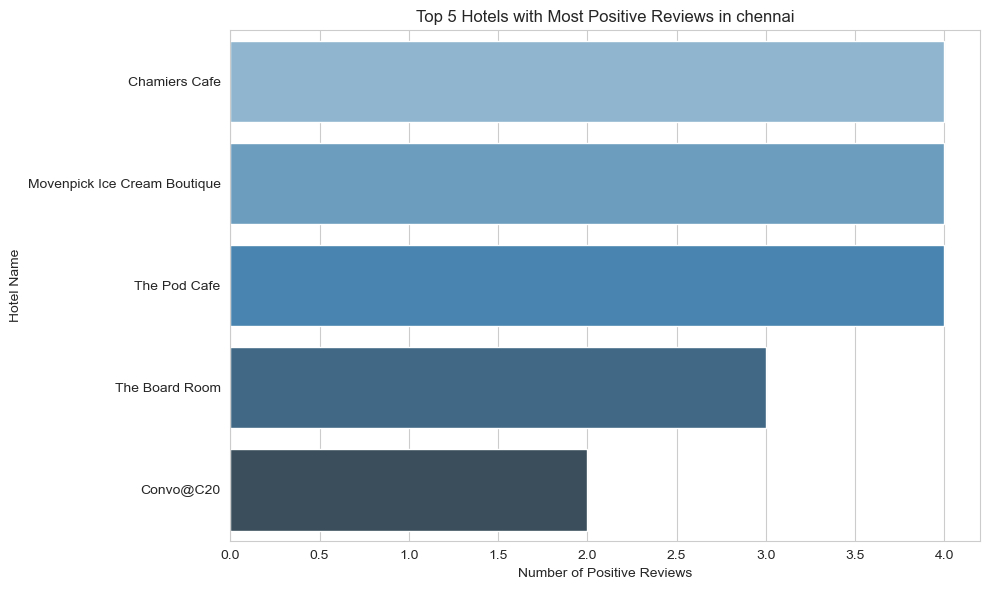

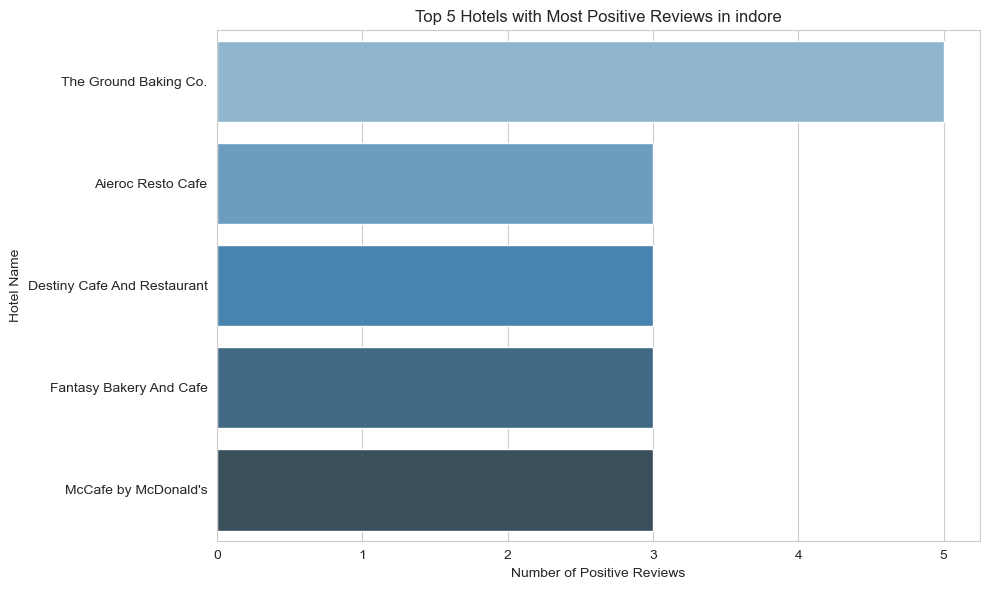

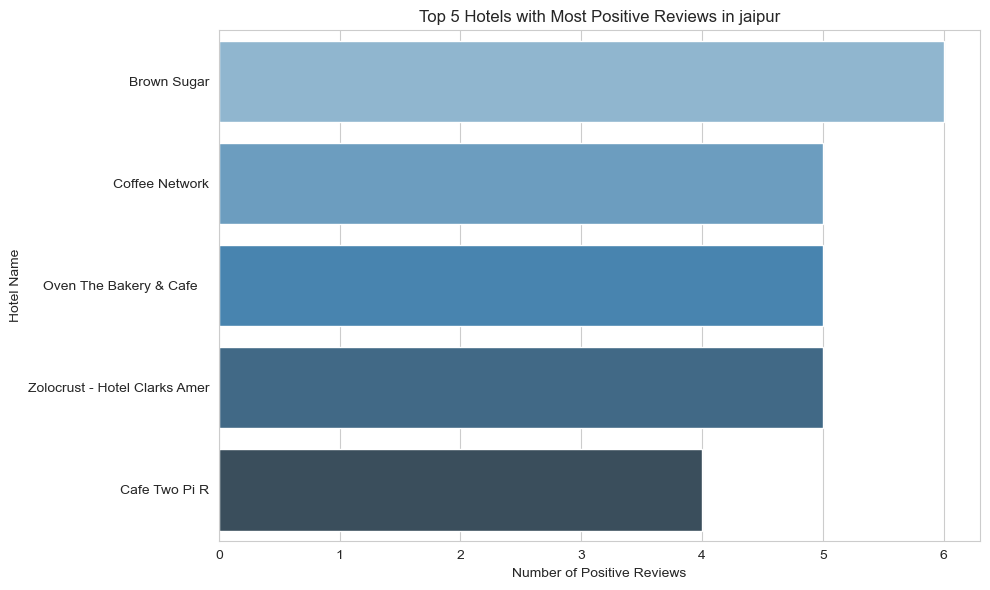

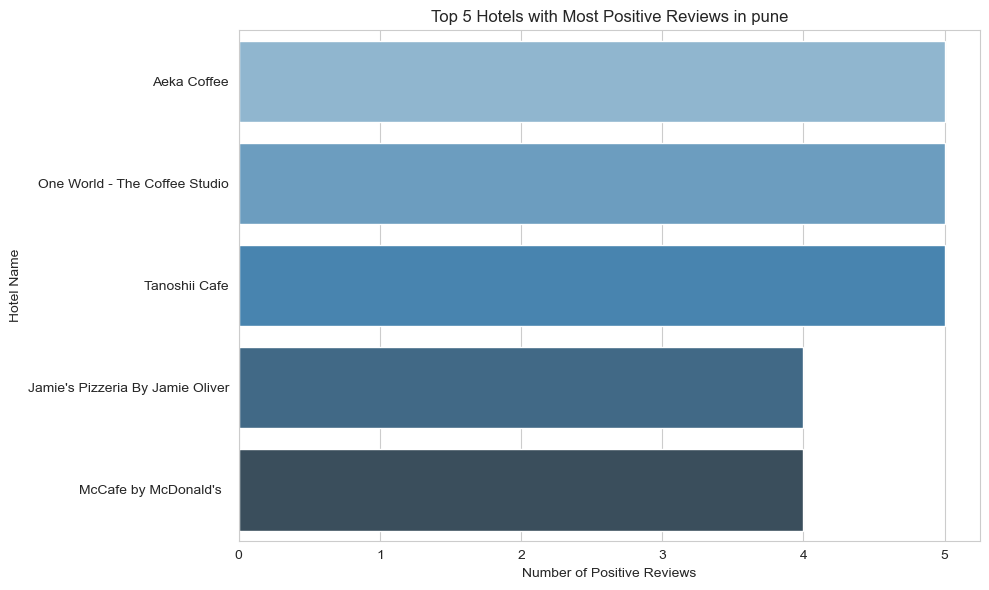

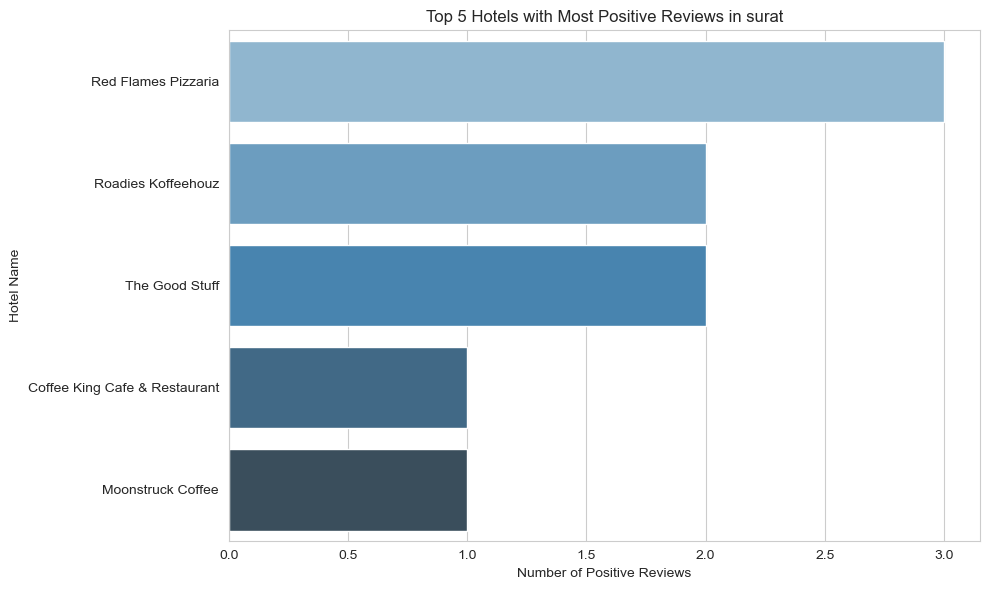

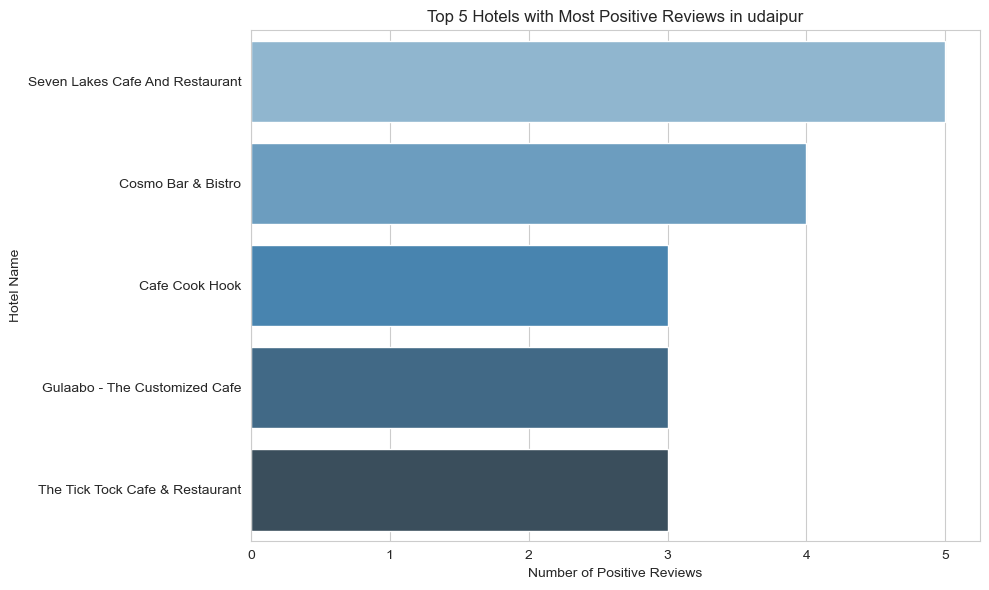

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data creation for demonstration (replace this with your actual data loading step)
# Assume 'data' is your dataframe with columns 'Name', 'Area', 'Overall_Rating', and 'Sentiment Score'
# data = pd.read_csv('your_data.csv')

# Define the threshold for positive reviews
positive_threshold = 3.5

# Ensure 'Overall_Rating' is numeric and clean invalid entries
data['Overall_Rating'] = pd.to_numeric(data['Overall_Rating'], errors='coerce')

# Drop rows with missing ratings
data.dropna(subset=['Overall_Rating'], inplace=True)

# Create a new column 'Actual Label' based on the 'Overall Rating'
data['Actual Label'] = np.where(data['Overall_Rating'] >= positive_threshold, 'Positive', 'Negative')

# Filter for only positive reviews
positive_reviews = data[data['Actual Label'] == 'Positive']

# Group by 'Area' and 'Name', then count the number of positive reviews for each hotel in each city
positive_review_counts = positive_reviews.groupby(['City', 'Name']).size().reset_index(name='Positive_Review_Count')

# Sort by 'Area' and 'Positive_Review_Count' in descending order to get the top hotels in each city
positive_review_counts_sorted = positive_review_counts.sort_values(['City', 'Positive_Review_Count'], ascending=[True, False])

# Group by 'Area' and get the top 5 hotels for each city
top_5_hotels_by_city = positive_review_counts_sorted.groupby('City').head(5)

# Plotting separate bar charts for each city
cities = top_5_hotels_by_city['City'].unique()

for city in cities:
    city_data = top_5_hotels_by_city[top_5_hotels_by_city['City'] == city]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Positive_Review_Count', y='Name', data=city_data, palette='Blues_d')
    plt.title(f"Top 5 Hotels with Most Positive Reviews in {city}")
    plt.xlabel('Number of Positive Reviews')
    plt.ylabel('Hotel Name')
    plt.tight_layout()
    plt.show()

Based on the Zomato Cafe Reviews dataset and the sentiment analysis, the following conclusions can be drawn:

Customer Satisfaction Variability: The sentiment analysis shows that customer satisfaction varies significantly across cafes and cities, with some cafes receiving consistently positive reviews while others struggle with customer dissatisfaction. This variability highlights opportunities for targeted improvements in specific cafes or regions.

Key Drivers of Positive Sentiment: Factors such as food quality, ambiance, and service play crucial roles in driving positive reviews. Cafes that excel in these areas tend to gather higher sentiment scores, indicating their importance in enhancing customer experiences.

Actionable Insights for Business Strategy: By identifying cafes with the most positive and negative reviews, businesses can focus on replicating the successful practices of high-performing cafes while addressing the common complaints in underperforming ones. This can lead to improved customer satisfaction and loyalty across the platform​(Zomato Cafe Reviews).






